In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np

from energy import solar_power_estimate
from energy import solar_day_curve_with_weather

In [3]:
random.seed(42)

In [4]:
area = 0.248213  # from Panasonic AM-5608CAR solar panel
eta_ref=0.0005  # 0.05% efficiency for testing low power scenarios

In [5]:
def plot_daily_curve(n, latitude, tilt=30, azimuth=0, area=1.6, **kwargs):
    hours = np.linspace(0, 24, 145)  # every 10 minutes
    power = [solar_power_estimate(n, h, latitude, tilt, azimuth, area=area, **kwargs) for h in hours]

    plt.figure(figsize=(8,4))
    plt.plot(hours, power, label="Panel Power (W)")
    plt.title(f"Daily Power Curve (Day {n}, lat {latitude}°)")
    plt.xlabel("Solar Time (hours)")
    plt.ylabel("Power (W)")
    plt.grid(True)
    plt.legend()
    plt.show()


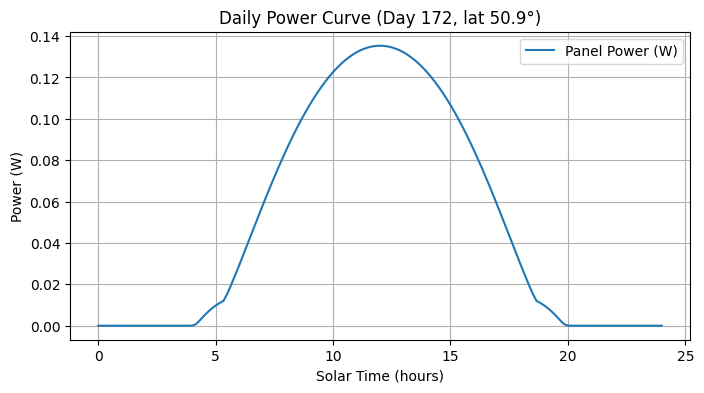

In [6]:
# Example: Brussels, June 21 (day 172)
plot_daily_curve(n=172, latitude=50.9, tilt=30, azimuth=0, area=area, eta_ref=eta_ref)

In [7]:
def plot_week_curve(start_day, latitude, tilt=30, azimuth=0, area=1.6, days=7, **kwargs):
    hours = np.linspace(0, 24, 145)  # 10-min steps
    plt.figure(figsize=(10,5))

    for d in range(days):
        n = start_day + d
        power = [solar_power_estimate(n, h, latitude, tilt, azimuth, area=area, **kwargs) for h in hours]
        plt.plot(hours, power, label=f"Day {n}")

    plt.title(f"Daily Power Curves for Days {start_day}–{start_day+days-1}")
    plt.xlabel("Solar Time (hours)")
    plt.ylabel("Power (W)")
    plt.legend()
    plt.grid(True)
    plt.show()

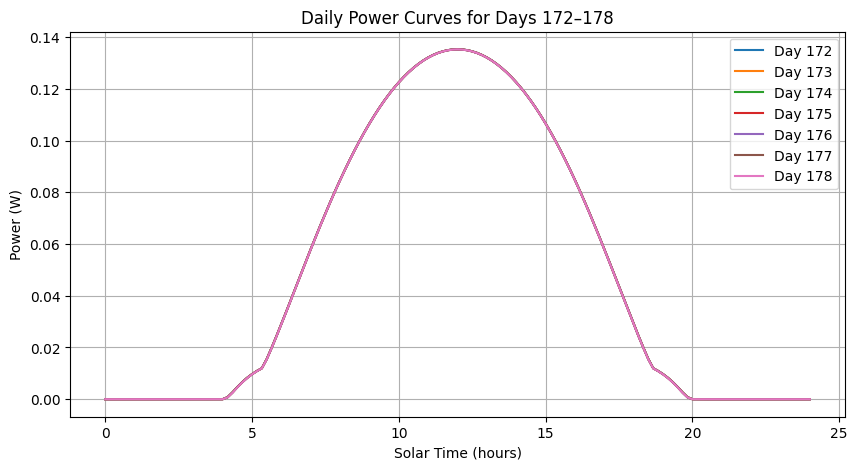

In [8]:
#  Example: Brussels, week starting June 21 (day 172)
plot_week_curve(start_day=172, latitude=50.9, tilt=30, azimuth=0, area=area, days=7, eta_ref=eta_ref)


In [9]:
def plot_year_same_weekday(start_day, latitude, tilt=30, azimuth=0, area=1.6, weeks=52, **kwargs):
    hours = np.linspace(0, 24, 145)  # 10-min steps
    plt.figure(figsize=(12,6))

    for w in range(weeks):
        n = start_day + 7*w
        if n > 365:  # stop if we exceed the year
            break
        power = [solar_power_estimate(n, h, latitude, tilt, azimuth, area=area, **kwargs) for h in hours]
        plt.plot(hours, power, alpha=0.4)  # semi-transparent lines

    plt.title(f"Weekly Power Curves (every 7 days, starting from day {start_day})")
    plt.xlabel("Solar Time (hours)")
    plt.ylabel("Power (W)")
    plt.grid(True)
    plt.savefig("year_same_weekday.pdf")
    plt.show()

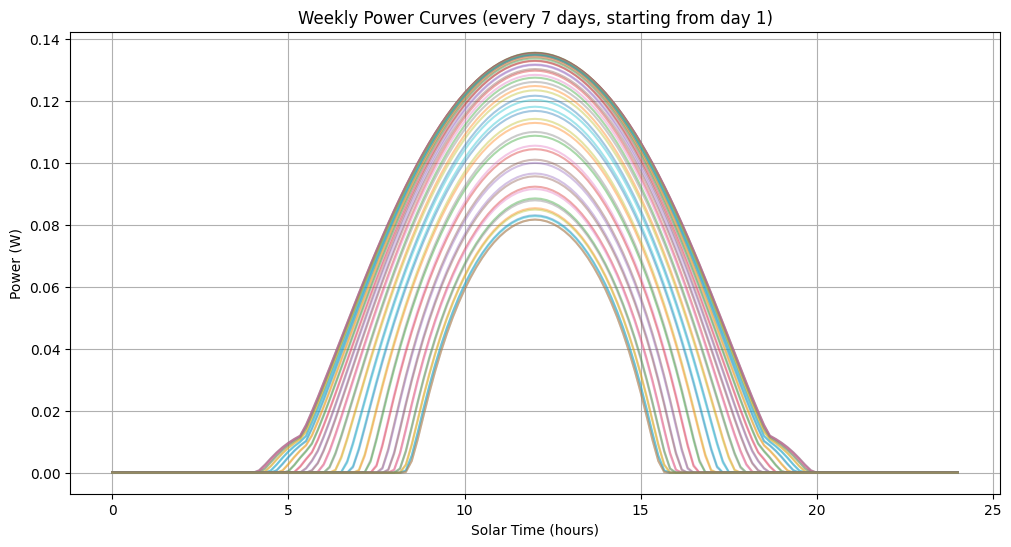

In [10]:
# Example: plot every Monday starting at day 1 (Monday of week 1)
plot_year_same_weekday(start_day=1, latitude=50.9, tilt=30, azimuth=0, area=area, weeks=52, eta_ref=eta_ref)

## account for daily weather variations

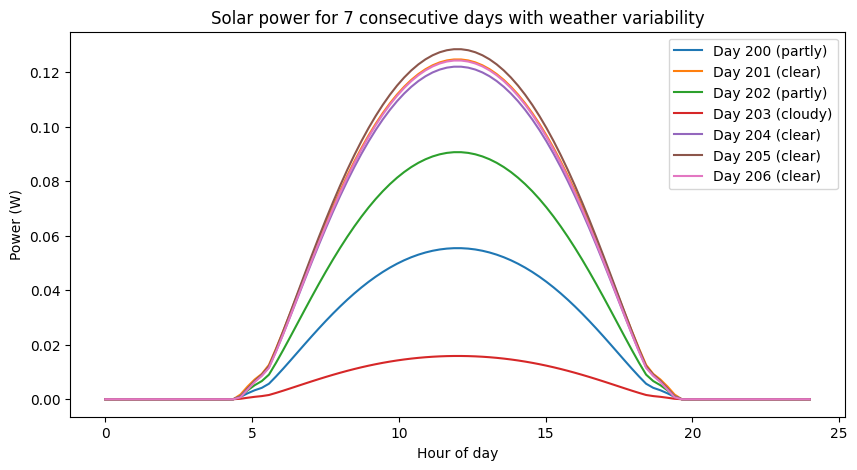

In [11]:
latitude, tilt, azimuth = 50, 30, 0   # example
hours = np.linspace(0, 24, 100)

start_day = 200  # e.g., day of year

plt.figure(figsize=(10,5))

for d in range(7):
    n = start_day + d
    curve, state = solar_day_curve_with_weather(n, hours, latitude, tilt, azimuth, area=area, eta_ref=eta_ref)
    plt.plot(hours, curve, label=f"Day {n} ({state})")

plt.xlabel("Hour of day")
plt.ylabel("Power (W)")
plt.title("Solar power for 7 consecutive days with weather variability")
plt.legend()
plt.savefig("weekly_power_with_weather.pdf")
plt.show()